# グラフ作成
#### 各種のグラフ作成をまとる。作成グラフは以下に。
#### ・Stock status（在庫状況）
#### ・仕入状況
#### ・部門別売上金額

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Library set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install japanize-matplotlib
import japanize_matplotlib

     |████████████████████████████████| 4.1MB 7.4MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=f9389806678ecd3db2d2ffda8efc849536b435130bfb666f6fa7e72484300cab
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


### Data Read

In [ ]:
# データ読込
siiredf_n = pd.read_csv("/content/drive/My Drive/Purchased products/csv/N_S_2007_2021.csv")

zaikodf_n = pd.read_csv("/content/drive/My Drive/Purchased products/csv/N_Z_2009_2021.csv")

target_columns = ["年度","売上月", "部門","小分類","品目","品名","販売数量","販売単価","販売金額","請求先CD"]
uriagedf_n = pd.read_csv("/content/drive/My Drive/Purchased products/csv/N_U_2007_2021.csv", usecols=target_columns)
uriagedf_n = uriagedf_n[uriagedf_n["年度"]>=2016]

zaikodf_i = pd.read_csv("/content/drive/My Drive/Purchased products/csv/I_Z_2009_2021.csv")

uriagedf_i = pd.read_csv("/content/drive/My Drive/Purchased products/csv/I_U_2009_2021.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,6,17,19,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,13,19,20,21,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result

### Graph

#### Stock status（在庫状況）

In [ ]:
zaikodf_i.columns

Index(['Unnamed: 0', 'ロケーションNo', 'ロケーション名', '棚卸月', '品目', '品名', '規格', '大分類CD',
       '大分類名', '小分類', '勘定科目CD', '勘定科目名', '予備1', '予備2', '在庫数', '在庫単価', '在庫金額'],
      dtype='object')

In [ ]:
zaikodf_i.groupby("大分類CD")["大分類名"].unique()

In [ ]:
target_id = ["I113","I114","I115","I116","I117","I118","I119","I128","I129"]

In [ ]:
# 絞り込み
df_zaiko_i = zaikodf_i[zaikodf_i["棚卸月"]>201905]
df_zaiko_i = df_zaiko_i[df_zaiko_i["大分類CD"].isin(target_id)]

In [ ]:
# 在庫金額を月ごとに集計
graph_data = pd.DataFrame(df_zaiko_i.groupby("棚卸月")["在庫金額"].sum()).reset_index()

In [ ]:
graph_data.coumns = ["棚卸月","在庫金額"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


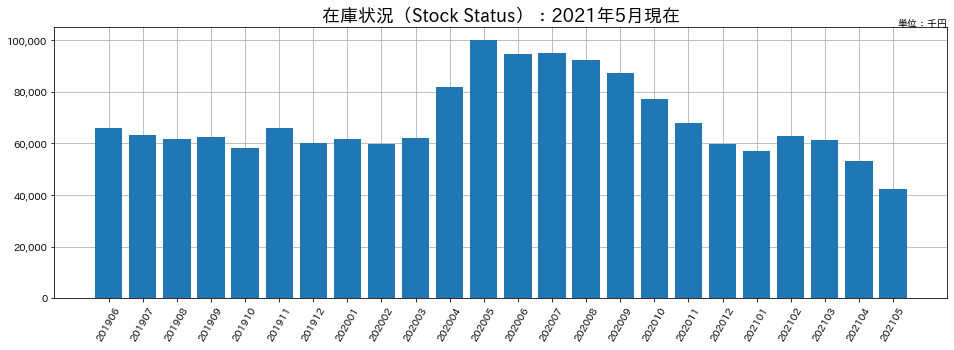

In [ ]:
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(111)

left = np.arange(0,24)
height = graph_data["在庫金額"]/1000
labels = []
for i in range(len(graph_data)):
    labels.append(graph_data.iloc[i]["棚卸月"])
plt.bar(left, height, tick_label=labels)
plt.title('在庫状況（Stock Status）：2021年5月現在', fontsize=18)
fig.text(0.9, 0.9, '単位：千円', ha='right', va='top')
plt.xticks(rotation=60)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# plt.savefig('test.png')

# ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=18)
ax.set_axisbelow(True)
plt.grid()
plt.show()

### 仕入状況

In [ ]:
# 仕入データの絞り込み
df_siire_n = siiredf_n[siiredf_n["仕入先CD"] == 90332]
df_siire_n = df_siire_n[df_siire_n["仕入月"]>201905]

In [ ]:
# 仕入データ集計
tmp = df_siire_n[df_siire_n['仕入月']<202006]
tmp_2019 = pd.DataFrame(tmp.groupby('仕入月')['仕入金額'].sum()).reset_index()

tmp = df_siire_n[df_siire_n['仕入月']>202005]
tmp_2020 = pd.DataFrame(tmp.groupby('仕入月')['仕入金額'].sum()).reset_index()


In [ ]:
tmp_2020.loc[-1] = [202105,0]

In [ ]:
num_cnt = 0
num_cnt_list = []
for i in range(len(tmp_2019)):
    num_cnt += tmp_2019.iloc[i]['仕入金額']
    num_cnt_list.append(num_cnt)
tmp_2019["累計"] = num_cnt_list

num_cnt = 0
num_cnt_list = []
for i in range(len(tmp_2020)):
    num_cnt += tmp_2020.iloc[i]['仕入金額']
    num_cnt_list.append(num_cnt)
tmp_2020["累計"] = num_cnt_list


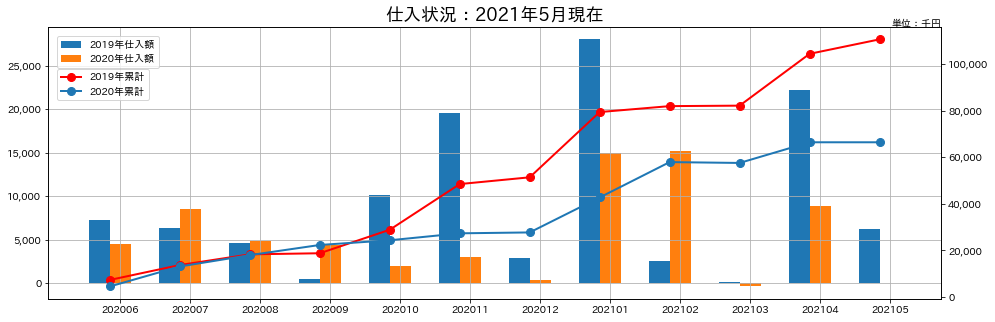

In [ ]:
# データセット
left = np.arange(0,12)

height = tmp_2020["仕入金額"]/1000
height1 = tmp_2019["仕入金額"]/1000
y1 = tmp_2020["累計"]/1000
y2 = tmp_2019["累計"]/1000
labels = tmp_2020["仕入月"]
width = 0.3

fig = plt.figure(figsize=(16, 5))
#第一軸(ax1)と第二軸(ax2)を作って関連付ける
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

#第一軸を折れ線グラフ、第二軸を棒グラフに
ax1.bar(left - width / 2, height1, label='2019年仕入額', width=width)
ax1.bar(left + width / 2, height, label='2020年仕入額', tick_label=labels, width=width)
ax2.plot(left, y2, linewidth=2, color="red", linestyle="solid", marker="o", markersize=8, label='2019年累計')
ax2.plot(left, y1, linewidth=2, linestyle="solid", marker="o", markersize=8, label='2020年累計')

plt.title('仕入状況：2021年5月現在', fontsize=18)
fig.text(0.9, 0.9, '単位：千円', ha='right', va='top')
# plt.xticks(rotation=60)

ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# plt.savefig('test.png')

ax1.legend(loc=(0.01, 0.85))
ax2.legend(loc=(0.01, 0.73))
ax1.grid()
plt.show()

### 部門別売上金額

In [ ]:
uriagedf_n["売上月"] = uriagedf_n["売上月"].astype(int)
uriagedf_n["年度"] = uriagedf_n["年度"].astype(int)
uriagedf_n["品目"] = uriagedf_n["品目"].astype(int)
uriagedf_n["販売数量"] = uriagedf_n["販売数量"].astype(int)
uriagedf_n["販売単価"] = uriagedf_n["販売単価"].astype(int)
uriagedf_n["販売金額"] = uriagedf_n["販売金額"].astype(int)

group_sum = uriagedf_n.groupby(["年度", "部門"]).sum()["販売金額"]
group_sum[2016]

In [ ]:
bumon = ["11部門", "12部門", "13部門", "14部門", "15部門", "29共通"]
nendo = [2016, 2017, 2018, 2019, 2020]

In [ ]:
x = np.sort(uriagedf_n["年度"].unique())

y = [[], [], [], [], [], []]

for i in range(0, 6):
    for j in range(0, 5):
        y[i].append(group_sum[nendo[j]][bumon[i]]/1000)

In [ ]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

N = 5
A = np.array(y[0])
B = np.array(y[1])
C = np.array(y[2])
D = np.array(y[3])
E = np.array(y[4])
F = np.array(y[5])             
ind = np.arange(N) 
width = 0.35

ind_p = ind + width/2
ind_m = ind - width/2
ind_line = np.sort(np.concatenate([ind_p,ind_m]))
A_line = (np.insert(A, np.arange(5), A))
B_line = (np.insert(B, np.arange(5), B)) + A_line
C_line = (np.insert(C, np.arange(5), C)) + B_line
D_line = (np.insert(D, np.arange(5), D)) + C_line
E_line = (np.insert(E, np.arange(5), E)) + D_line
F_line = (np.insert(F, np.arange(5), F)) + E_line

p1 = ax.bar(ind, A, width,zorder=2)
p2 = ax.bar(ind, B, width,bottom=A,zorder=2)
p3 = ax.bar(ind, C, width,bottom=A+B,zorder=2)
p4 = ax.bar(ind, D, width,bottom=A+B+C,zorder=2)
p5 = ax.bar(ind, E, width,bottom=A+B+C+D,zorder=2)
p6 = ax.bar(ind, F, width,bottom=A+B+C+D+E,zorder=2)

ax.plot(ind_line,A_line,'--k',zorder=1)
ax.plot(ind_line,B_line,'--k',zorder=1)
ax.plot(ind_line,C_line,'--k',zorder=1)
ax.plot(ind_line,D_line,'--k',zorder=1)
ax.plot(ind_line,E_line,'--k',zorder=1)
ax.plot(ind_line,F_line,'--k',zorder=1)

plt.title('部門別売上金額：年度別5年間推移', fontsize=18)
plt.ylabel('販売金額')
fig.text(0.9, 0.9, '単位：千円', ha='right', va='top')

plt.xticks(ind, nendo)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.legend((p6[0], p5[0],p4[0],p3[0], p2[0],p1[0]),('共通','部門','部門','部門','部門','部門'), loc=(0.01, 0.18), fontsize=16)

### 交差比率

In [ ]:
# データ絞り込み
uriagedf_i = uriagedf_i[uriagedf_i["年度"]==2020]

In [ ]:
# 品目CDをキーに大分類、小分類、品名、規格をセット
meisyou_dict = {}
for i in range(len(uriagedf_i)):
    if uriagedf_i.iloc[i]["品目"] in meisyou_dict:
        continue
    else:
        meisyou_dict[uriagedf_i.iloc[i]["品目"]] = [uriagedf_i.iloc[i]["大分類"], 
                                                    uriagedf_i.iloc[i]["小分類"], 
                                                    uriagedf_i.iloc[i]["品名"], 
                                                    uriagedf_i.iloc[i]["規格"]]

In [ ]:
# 品目毎に売上集計
uriage_group_dict = dict(uriagedf_i.groupby("品目").sum()["販売金額"])
num_dict = {}
for i in meisyou_dict.keys():
    num_dict[i] = [0,0,0,0,0,0,0,0,0]

In [ ]:
for i, j in uriage_group_dict.items():
    num_dict[i][0] = j

In [ ]:
# 期首、期末在庫セット
for i in range(len(zaikodf_i)):
    if zaikodf_i.iloc[i]["棚卸月"] == 202005:
        if zaikodf_i.iloc[i]["品目"] in uriage_group_dict:
            num_dict[zaikodf_i.iloc[i]["品目"]][1] += zaikodf_i.iloc[i]["在庫金額"]
        else:
            num_dict[zaikodf_i.iloc[i]["品目"]] = [0,0,0,0,0,0,0,0,0]
            num_dict[zaikodf_i.iloc[i]["品目"]][1] += zaikodf_i.iloc[i]["在庫金額"]
    elif zaikodf_i.iloc[i]["棚卸月"] == 202105:
        if zaikodf_i.iloc[i]["品目"] in uriage_group_dict:
            num_dict[zaikodf_i.iloc[i]["品目"]][2] += zaikodf_i.iloc[i]["在庫金額"]
        else:
            num_dict[zaikodf_i.iloc[i]["品目"]] = [0,0,0,0,0,0,0,0,0]
            num_dict[zaikodf_i.iloc[i]["品目"]][2] += zaikodf_i.iloc[i]["在庫金額"]

In [ ]:
uriagedf_n

In [ ]:
# 仕入データ絞り込み（売上からのみに）
uriagedf_n = uriagedf_n[uriagedf_n.請求先CD==10233]
uriagedf_n = uriagedf_n[uriagedf_n.年度==2020]
uriagedf_n.品目 = uriagedf_n.品目.astype(int)
# 仕入金額セット
for i in range(len(uriagedf_n)):
    if ("I" + str(uriagedf_n.iloc[i]["品目"])) in num_dict:
        num_dict["I"+str(uriagedf_n.iloc[i]["品目"])][3] += uriagedf_n.iloc[i]["販売金額"]

In [ ]:
# その他経営数字を算出
for i, j in num_dict.items():
    # 売上原価
    num_dict[i][4] = num_dict[i][1] + num_dict[i][3] - num_dict[i][2]
    # 粗利益
    num_dict[i][5] = num_dict[i][0] - num_dict[i][4]
    # 在庫回転率
    if ((num_dict[i][1]+num_dict[i][2])) == 0:
        num_dict[i][6] = 0
    else:
        num_dict[i][6] = num_dict[i][4] / ((num_dict[i][1]+num_dict[i][2])/2)
    # 在庫回転期間
    if num_dict[i][0] == 0:
        num_dict[i][7] = 0
    else:
        num_dict[i][7] = num_dict[i][2] / (num_dict[i][0] / 12)
    # 交差比率
    if ((num_dict[i][1]+num_dict[i][2])) == 0:
        num_dict[i][8] = 0
    else:
        num_dict[i][8] = num_dict[i][5] / ((num_dict[i][1]+num_dict[i][2])/2)

In [ ]:
meisyou_df = pd.DataFrame(meisyou_dict)
num_df = pd.DataFrame(num_dict)

In [ ]:
concat_df = pd.concat([meisyou_df, num_df])
concat_df = concat_df.T
concat_df = concat_df.set_axis(["大分類","小分類","品名","規格","売上","期首在庫","期末在庫","仕入","売上原価","粗利益","在庫回転率","在庫回転期間","交差比率"], axis=1)

In [ ]:
concat_df["売上"] = concat_df["売上"].astype(int)
concat_df["期首在庫"] = concat_df["期首在庫"].astype(int)
concat_df["期末在庫"] = concat_df["期末在庫"].astype(int)
concat_df["仕入"] = concat_df["仕入"].astype(int)
concat_df["売上原価"] = concat_df["売上原価"].astype(int)
concat_df["粗利益"] = concat_df["粗利益"].astype(int)
concat_df["在庫回転率"] = concat_df["在庫回転率"].astype(float)
concat_df["在庫回転期間"] = concat_df["在庫回転期間"].astype(float)
concat_df["交差比率"] = concat_df["交差比率"].astype(float)

In [ ]:
concat_df.head()

In [ ]:
bar_data = concat_df[concat_df["期末在庫"] > 0]
bar_data = bar_data.sort_values(["期末在庫"], ascending=False)
bar_data_range = bar_data[bar_data["期末在庫"]>500000]

bar_data_range["品目"] = bar_data_range.index
columns_name = ["大分類","小分類","品目","品名","規格","売上","期首在庫","期末在庫","仕入","売上原価","粗利益","在庫回転率","在庫回転期間","交差比率"]
bar_data_range = bar_data_range[columns_name]
bar_data_range["粗利率"] = (bar_data_range["粗利益"] / bar_data_range["売上"]) * 100
bar_data_range = bar_data_range[bar_data_range["粗利益"] > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


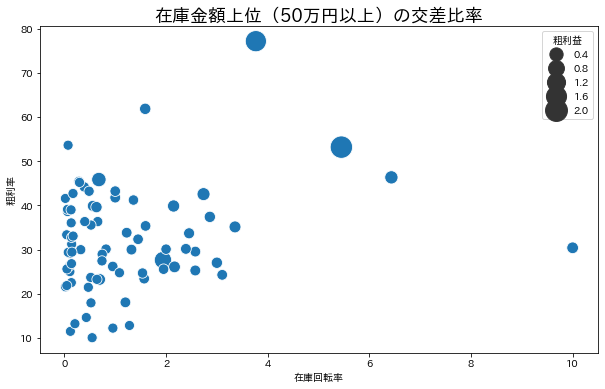

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plt.title('在庫金額上位（50万円以上）の交差比率', fontsize=18)

sns.scatterplot(x="在庫回転率", y="粗利率", size="粗利益", sizes=(100, 500), hue_norm=(0, 7), legend="brief", data=bar_data_range)